In [91]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import opendatasets as od
%matplotlib inline
plt.style.use('ggplot')

In [92]:
retailsales = pd.read_csv('./retail_sales_dataset.csv')

retailsales

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


**Data Cleaning**

In [93]:
# Check for missing values

missing_values = retailsales.isnull().sum()

print("Missing Values:")
print(missing_values)

Missing Values:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [94]:
# Check if there are any missing values in the entire dataset

if missing_values.any():
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values found in the dataset.")


No missing values found in the dataset.


In [95]:
# Check for and remove duplicates

print("\nDuplicates Before Removal:")
print(retailsales.duplicated().sum())



Duplicates Before Removal:
0


**Exploratory Data Analysis**

In [96]:
# Explore the distribution of sales over time

retailsales['Date'] = pd.to_datetime(retailsales['Date'])
retailsales.set_index('Date', inplace=True)


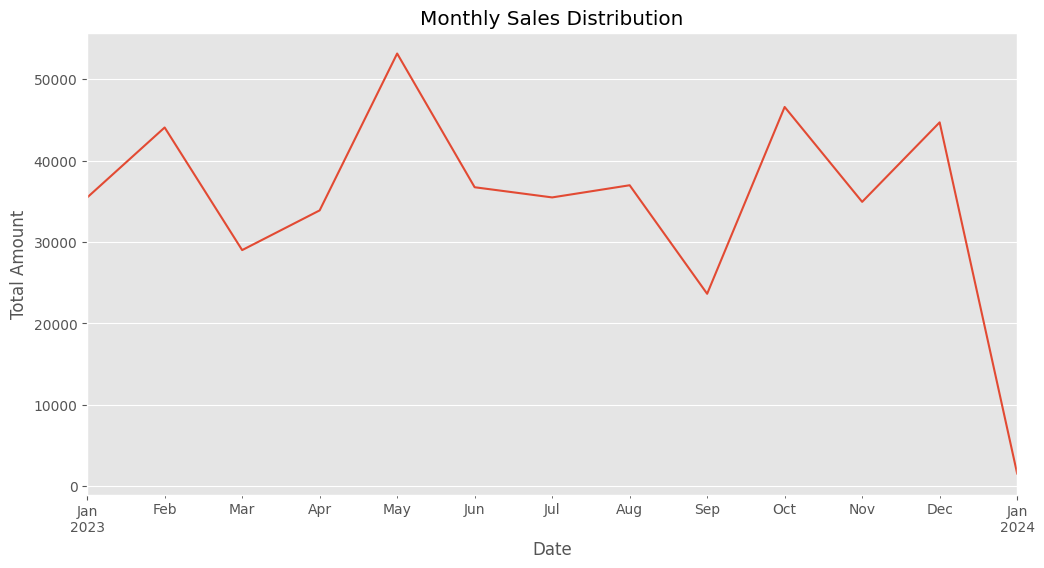

In [97]:
plt.figure(figsize=(12, 6))
retailsales.resample('M').sum()['Total Amount'].plot(title='Monthly Sales Distribution')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

In [98]:
# Analyze the top-selling products

top_products = retailsales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10)
print("\nTop Selling Products:")
print(top_products)


Top Selling Products:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


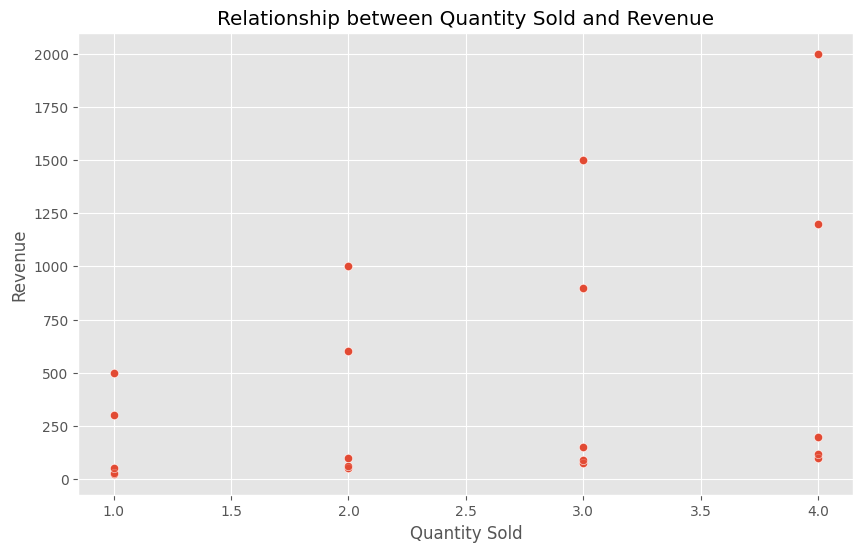

In [99]:
# Investigate the relationship between quantity sold and revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Amount', data=retailsales, alpha=0.7)
plt.title('Relationship between Quantity Sold and Revenue')
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue')
plt.show()

In [100]:
# Identify any trends or patterns in customer behavior

customer_behavior = retailsales.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

print("\nCustomer Behavior by Product Category:")

print(customer_behavior)


Customer Behavior by Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


**Customer Segmentation**

In [101]:
# Select relevant features for clustering
features_for_clustering = retailsales[['Total Amount', 'Quantity']]

features_for_clustering

,Total Amount,Quantity
Date,,
2023-11-24,150,3
2023-02-27,1000,2
2023-01-13,30,1
2023-05-21,500,1
2023-05-06,100,2
...,...,...
2023-05-16,50,1
2023-11-17,90,3
2023-10-29,100,4


In [102]:
# Determine the optimal number of clusters using the Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 1

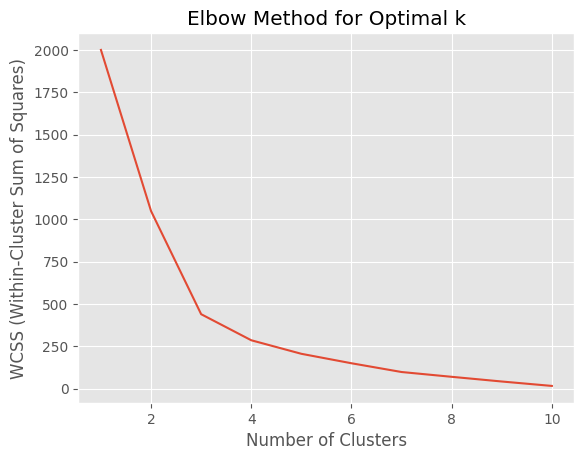

In [103]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [104]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
retailsales['cluster'] = kmeans.fit_predict(features_scaled)


c:\Users\user\anaconda3\envs\flex\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [105]:
# Provide insights into the characteristics of each customer segment

cluster_insights = retailsales.groupby('cluster')[['Total Amount', 'Quantity']].mean()
print("\nCluster Insights:")
print(cluster_insights)


Cluster Insights:
         Total Amount  Quantity
cluster                        
0          171.935123  1.434004
1         1297.727273  3.204545
2          126.453287  3.553633


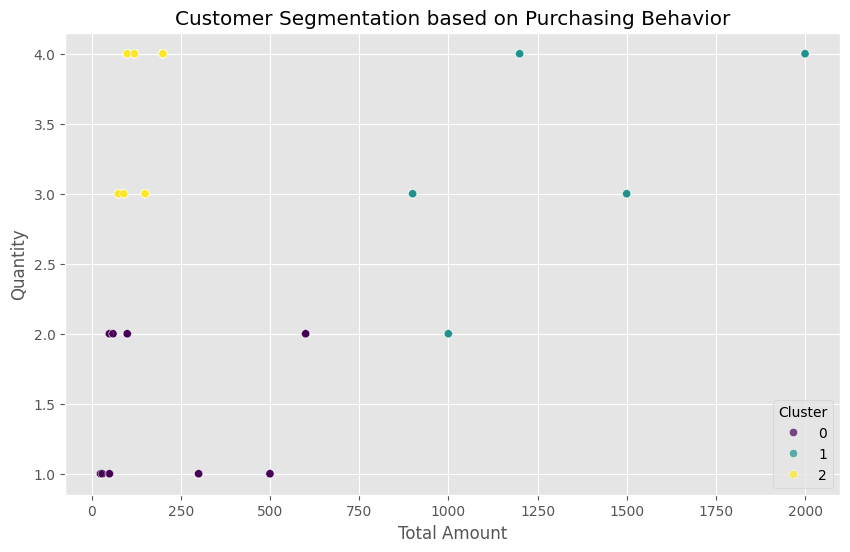

In [106]:
# Visualize the clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Amount', y='Quantity', hue='cluster', data=retailsales, palette='viridis', alpha=0.7)
plt.title('Customer Segmentation based on Purchasing Behavior')
plt.xlabel('Total Amount')
plt.ylabel('Quantity')
plt.legend(title='Cluster')
plt.show()

**Price Optimization**

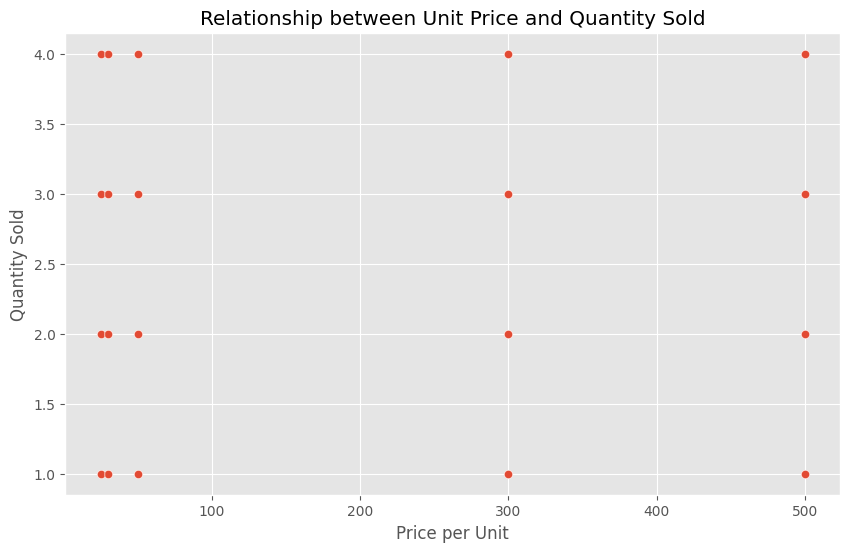

In [107]:
# Visualize the relationship between unit price and quantity sold

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price per Unit', y='Quantity', data=retailsales, alpha=0.7)
plt.title('Relationship between Unit Price and Quantity Sold')
plt.xlabel('Price per Unit')
plt.ylabel('Quantity Sold')
plt.show()

In [108]:
# Analyze the correlation between unit price and quantity sold

correlation = retailsales['Price per Unit'].corr(retailsales['Quantity'])
print(f"\nCorrelation between Unit Price and Quantity Sold: {correlation}")



Correlation between Unit Price and Quantity Sold: 0.017501280115958653


 **Data Visualization**

C:\Users\user\AppData\Local\Temp\ipykernel_12100\3014651277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', data=retailsales, palette='viridis')


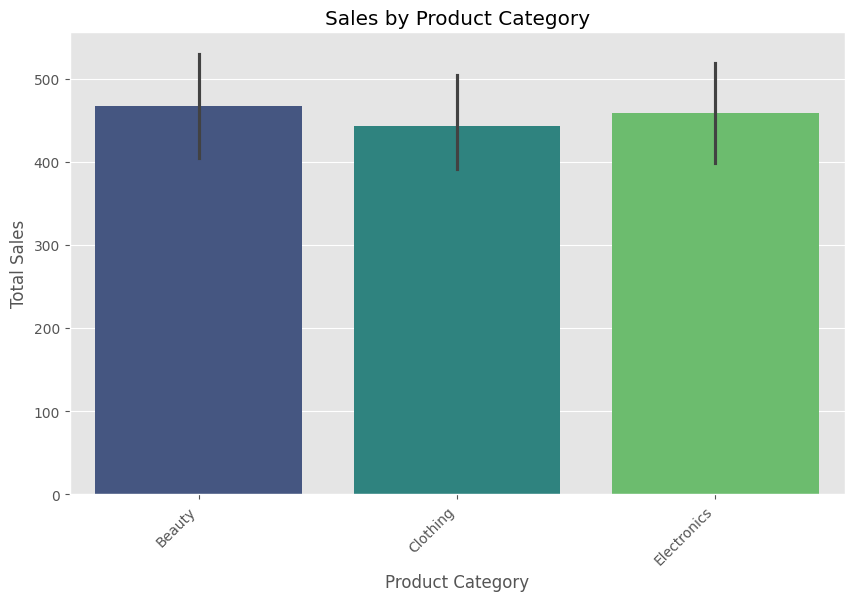

In [109]:
# Visualization 2: Bar chart of sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Category', y='Total Amount', data=retailsales, palette='viridis')
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

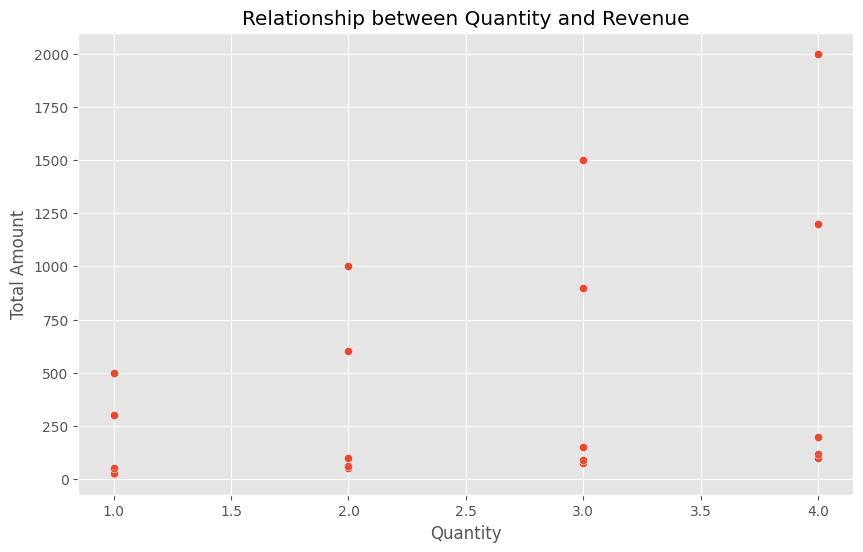

In [110]:
# Visualization 3: Scatter plot of the relationship between two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='Total Amount', data=retailsales, alpha=0.7)
plt.title('Relationship between Quantity and Revenue')
plt.xlabel('Quantity')
plt.ylabel('Total Amount')
plt.show()